## Welcome to Jupyter

Here we can create notebooks, which are a great way to test and share code.

In a Jupyter notebook you can write either text within a cell using markdown, or write code within a cell. 

To change the cell type use the drop down above, however there are also many shortcut keys to help speed this up. 

1. Press Esc to exit out of writing mode
2. Press Enter to return to writing mode within a cell
3. Navigate between cells using up and down arrows
4. Press Ctrl+Enter to run a cell
5. When out of writing mode, use X to delete the current cell, A/B to insert cells above and below the current cell
6. For more useful shortcut keys please see this fantastic link https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

---


In [5]:
## Now we are in a code cell the text we write will be interpreted as python code 
a = 2
print(a)

2


Earlier we saw how we could install packages using Anaconda Navigator, and using terminal booted from within the Navigator. We can also install packages from within jupyter notebooks, by using `!` before commands we typed into the terminal. 

In [6]:
## We are going to use this to install a package called anaconda-client using conda install
!conda install anaconda-client -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\NewEnv:
#
anaconda-client           1.6.3                    py35_0  


The use of the `-y` argument here is **very** important, as this tells the installer to not wait for the user to respond to the prompt about whether to install the packages, i.e. having to press y/n. If you want to review the packages that will be installed/modified then it is best to insall them using the terminal. 

---

By default, the use of `!conda install` in this way will install the package to the environment location that we are running the kernel in. This would be the environment from which we started jupyter notebook from, but we can check this by looking at some of the system variables from the `sys` module. 

In [7]:
import sys
sys.executable

'C:\\Users\\Oliver\\Anaconda3\\envs\\NewEnv\\python.exe'

We also said that we would look at using pandas, numpy and matplotlib to explore how to carry out some basic date import, manipulation and plotting. As such we will have to import some additional packages. To see which pacakges we already have installed, however, we can make use of `pip`. pip is a package management system used to install and manage software packages written in Python. It is similar to conda, however there are key fundamental differences that are outside the scope of this tutorial to explore. However, for interested users I would recommend reading the following excellent discussion about the difference and related strengths and weaknesses of `pip` vs `conda` (https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/). For the moment we will continue to use conda to install packages. 

In [14]:
# We can use pip freeze to examine what packages and their versions are installed from within our jupyter session
!pip freeze

anaconda-client==1.6.3
bleach==1.5.0
certifi==2016.2.28
clyent==1.2.2
colorama==0.3.9
decorator==4.1.2
entrypoints==0.2.3
html5lib==0.9999999
ipykernel==4.6.1
ipython==6.1.0
ipython-genutils==0.2.0
ipywidgets==6.0.0
jedi==0.10.2
Jinja2==2.9.6
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.1.0
jupyter-console==5.2.0
jupyter-core==4.3.0
MarkupSafe==1.0
mistune==0.7.4
nbconvert==5.2.1
nbformat==4.4.0
notebook==5.0.0
numpy==1.13.1
pandocfilters==1.4.2
path.py==10.3.1
pickleshare==0.7.4
prompt-toolkit==1.0.15
Pygments==2.2.0
python-dateutil==2.6.1
pytz==2017.2
PyYAML==3.12
pyzmq==16.0.2
qtconsole==4.3.1
requests==2.14.2
simplegeneric==0.8.1
six==1.10.0
testpath==0.3
tornado==4.5.2
traitlets==4.3.2
wcwidth==0.1.7
widgetsnbextension==3.0.2
win-unicode-console==0.5
wincertstore==0.2


We can see that we still need to install matplotlib, and pandas:

In [2]:
!conda install matplotlib -y # install matplotlib
!conda install pandas -y # install pandas

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\NewEnv:
#
matplotlib                2.0.2               np113py35_0  
Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\NewEnv:
#
pandas                    0.20.3                   py35_0  


Now that we have got all the pacakges we need, and have set up our environment as we want it may be useful to save our environment so that if we share our notebook with another person they have the same environment that we used. We can do this using our earlier installed package anaconda-client:

In [8]:
# we use the conda command to export our environment "NewEnv" and save it as "cldsforall.yml"
!conda env export -n NewEnV -f cldsforall.yml

We could now upload that environment to our Anaconda cloud account that would then mean that other users could download it and install it as a new environment within their own Anaconda Navigator, so that they could carry out the next sections without having to carry out the previous sections. This can be found, for example, at our anaconda cloud account here (https://anaconda.org/clds/environments)

## Intro to pandas, numpy and matplotlib (and Seaborn)

Firstly, I know I didn't include seaborn in the description but while writing this sections as a beginner myself, I did some more reading and like how it enables more out the box visualisation (plus it has the Titanic sample dataset included so that's great), and it sits sort of on top of matplotlib so that you can gain more fine scale functionalty if it's needed.

In [9]:
!conda install seaborn -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment C:\Users\Oliver\Anaconda3\envs\NewEnv:

The following NEW packages will be INSTALLED:

    patsy:       0.4.1-py35_0      
    scipy:       0.19.1-np113py35_0
    seaborn:     0.8-py35_0        
    statsmodels: 0.8.0-np113py35_0 

seaborn-0.8-py   0% |                              | ETA:  --:--:--   0.00  B/s
seaborn-0.8-py   4% |#                              | ETA:  0:00:00   8.19 MB/s
seaborn-0.8-py   9% |##                             | ETA:  0:00:00  10.92 MB/s
seaborn-0.8-py  14% |####                           | ETA:  0:00:00  12.29 MB/s
seaborn-0.8-py  18% |#####                          | ETA:  0:00:00  13.11 MB/s
seaborn-0.8-py  23% |#######                        | ETA:  0:00:00  11.70 MB/s
seaborn-0.8-py  28% |########                       | ETA:  0:00:00  12.29 MB/s
seaborn-0.8-py  32% |##########                     | ETA:  0:00:00  11.47 MB/s
seaborn-0.

In [42]:
# Now let's import the packages as shortened abbreviations for ease later on:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load dataset that comes within seaborn
titanic = sns.load_dataset('titanic')

The first/main thing to know about (i think) with pandas is how the various datastructures work within pandas. They are built on top of NumPy, which provides multi-dimensional arrays and very quick operations internally for its data structures. Pandas then makes these methods very easy to use for data maniupulation and analysis. We'll have a quick look at some of these data structures, but a more in depth overview can be found here (https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).

In [37]:
## We have  series in pandas, which are 1-dimensional arrays with one axis called "index".
## As it is an array it can have different data types within the array
pd.Series([1, 10, 'clds', np.nan], index=['a', 'b', 'b', 7])

a       1
b      10
b    clds
7     NaN
dtype: object

In [38]:
## Then we have data frames which are 2 dimensional structures (similar looking to a conventional table for example)
pd.DataFrame({'D': [7, 14], 'M': [9, 9], 'Y': [2017, 2017]})

,D,M,Y
0,7,9,2017
1,14,9,2017


There are also structures for >=3 dimensional data, however, we won't have time to cover those, but head here to have a read (http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro-deprecate-panel).

---
Now we know some structures, we can look at out titanic dataset, and see what type of stucture it is by using the `type` function:

In [9]:
type(titanic)

pandas.core.frame.DataFrame

The dataset is a pandas DataFrame object, which means we could use the inbuit functions associated with the DataFrame, which are accessed by typing a `.` after a DataFrame object. What this means is that the DataFrame object has its own functions that manipulate the data inside it. To see what functions can be called after we have typed `.` we just press TAB:

In [10]:
## info shows us the type of data stored within our dataframe as well as how many are NULL entries.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [23]:
## We can also look at individual columns within ourdataframe by selecting them. Let's look at the ages first
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

We can also view a column by accessing the name of the column via ```titanic['age']```. However if we want to look at more than one column we can do it like this, with `head()` shortening the number of results displayed, so that a long list is displayed as above.

In [34]:
## .head(n) will show the first n rows
titanic[['age','sex']].head(10)

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male
8,27.0,female
9,14.0,female


We can also chain boolean lookups to look at a subset of the data. For example we may want to view the whole data frame but not the rows that don't have values for the age and sex.

In [35]:
## We are first looking for the rows where the value for sex is male or female
## then we look for age values that are not nulls (i.e. NaN in this case)
titanic[
    (titanic['sex'].isin(['male', 'female']))
    & (titanic.age.notnull())
].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


That's roughly all I think we'll have time for before looking at some plotting, but for more info then please have a look at this amazing resource that helped me loads and is where some of the inspiration for this tutorial came from (https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/).

---
We'll now look at some very basic plotting and how to manipulate our dataframe to help with this. To begin with we will plot the distribution of the ages, after we've removed the NaN numbers.

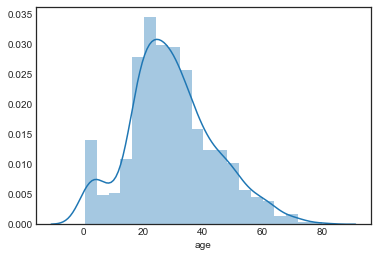

In [79]:
# plot the distribution - this creates the object that will be plotted when matplotlib.pyplot is called
sns.distplot(titanic.age.dropna())
plt.show()

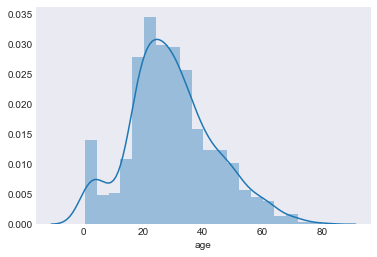

In [82]:
# we can also change the styling using sns. Let's say we don't like the white background, we can change the theme
sns.set_style("dark")
sns.distplot(titanic.age.dropna())
plt.show()

Let's saw we want to see how the age varies against other variables within out data frame. To do this we can plot a series of distributions of all the combinations of various variables, which is known as faceting. Let's have a look at how the age distribution changes dependent on whether individuals survived, and what class they were in on the Titanic. 

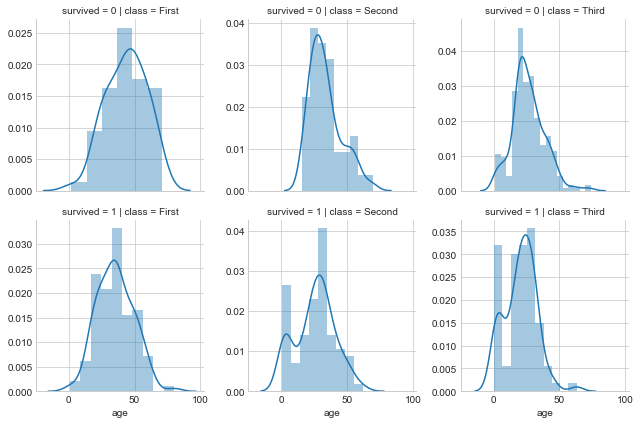

In [95]:
## Let's plot this, and set sharey to False so they all have their own y axes and are on white grids
sns.set_style("whitegrid")
g = sns.FacetGrid(titanic, row = 'survived', col='class', sharey = False)
g.map(sns.distplot, "age")
plt.show()

---
We're going to stop here, which hopefully gives everyone plenty of time to have gotten this far. Hopefully this has been a useful intro. For further reading I would recommend the following links that were very helpful to me:

https://www.dabapps.com/blog/introduction-to-pip-and-virtualenv-python/

https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

https://www.dabapps.com/blog/introduction-to-pip-and-virtualenv-python/

https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/